In [2]:
import pandas as pd 
import numpy as np 
import math

In [3]:
# Demonstrates Display of dataframe in a better way 
from IPython.display import display, HTML

# Tells matplotlib to display images inline instead of a new window
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
localPath = "./centroids"
fileType = "_10.csv"

In [5]:
allCentroids  = pd.read_csv(localPath+str(2001)+fileType)
for year in range(2002, 2017, 1):
    datasetFilePath = localPath+str(year)+fileType
    centroidDf = pd.read_csv(datasetFilePath)
    allCentroids = allCentroids.append(centroidDf)

In [6]:
allCentroids = allCentroids.reset_index()

In [7]:
allCentroids.head(15)

index  Unnamed: 0     Description            Location Description Arrest  \
0       0           0          SIMPLE                          STREET  False   
1       1           1  $500 AND UNDER                       RESIDENCE  False   
2       2           2       OVER $500                       APARTMENT  False   
3       3           3      TO VEHICLE                        SIDEWALK  False   
4       4           4  $500 AND UNDER                          STREET  False   
5       5           5     TO PROPERTY                           OTHER  False   
6       6           6          SIMPLE                       RESIDENCE  False   
7       7           7       OVER $500                          STREET  False   
8       8           8      AUTOMOBILE  PARKING LOT/GARAGE(NON.RESID.)  False   
9       9           9      TO VEHICLE                          STREET  False   
10      0           0          SIMPLE                          STREET  False   
11      1           1  $500 AND UNDER                       RESIDENCE  False   
12      2           2       OVER $500                       APARTMENT  False   
13      3           3     TO PROPERTY                        SIDEWALK  False   
14      4           4      TO VEHICLE                           OTHER  False   

   Domestic  District  Month  Day  Hour  Weekday  
0     False       2.0      1   12    18        4  
1     False       8.0      2    1    20        3  
2     False       9.0      3    7    21        2  
3     False      25.0      7    2    12        0  
4     False      25.0      3    3    19        5  
5     False      12.0      6   19    22        1  
6     False       6.0      3   26    22        0  
7     False      11.0      2   19    15        0  
8     False       7.0      5    6    14        6  
9     False       8.0      8    7    17        1  
10    False       8.0      7   12    22        4  
11    False      11.0      8    1    21        3  
12    False       2.0      5    7    18        1  
13    False      25.0     10   19    20        5  
14    False       7.0      9   25    12        2

In [8]:
uniqueLocations = allCentroids['Location Description'].unique()
uniqueLocations

array(['STREET', 'RESIDENCE', 'APARTMENT', 'SIDEWALK', 'OTHER',
       'PARKING LOT/GARAGE(NON.RESID.)', 'RESIDENCE-GARAGE'], dtype=object)

In [9]:
uniqueMonths = sorted(allCentroids['Month'].unique())
uniqueMonths

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [10]:
uniqueDays = sorted(allCentroids['Day'].unique())
uniqueDays

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30]

In [11]:
uniqueDistricts = sorted(allCentroids['District'].unique())
uniqueDistricts

[2.0, 3.0, 4.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 19.0, 25.0]

In [12]:
uniqueCrimes = allCentroids['Description'].unique()
uniqueCrimes

array(['SIMPLE', '$500 AND UNDER', 'OVER $500', 'TO VEHICLE',
       'TO PROPERTY', 'AUTOMOBILE', 'FORCIBLE ENTRY',
       'DOMESTIC BATTERY SIMPLE', 'FROM BUILDING',
       'POSS: CANNABIS 30GMS OR LESS'], dtype=object)

In [13]:
uniqueWeekdays = sorted(allCentroids['Weekday'].unique())
uniqueWeekdays

[0, 1, 2, 3, 4, 5, 6]

In [14]:
uniqueHours = sorted(allCentroids['Hour'].unique())
uniqueHours

[0, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]

In [15]:
def bokehScaledDataMaker(df, columnList, rowList, columnName, rowName): 
    bokehData = []
    for year in range(2001, 2017, 1):
        yearDf = df.loc[df['Year'] == year]
        totalNumCrimesYear = len(yearDf)
        for row in rowList:
            for col in columnList:
                cellInfo = {}
                freq = len(yearDf.loc[(yearDf[rowName] == row) & (yearDf[columnName] == col)])
                cellInfo['Year'] = year
                cellInfo[columnName] = col
                cellInfo[rowName] = row 
                cellInfo['Frequency'] =freq
                cellInfo['Year Frequency'] = freq/totalNumCrimesYear
                bokehData.append(cellInfo)  
        print("Done with year..."+str(year))
    
    return bokehData

In [16]:
import holoviews as hv


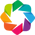

In [17]:
hv.extension('bokeh')

In [18]:
fileTypeClusters= "_10.csv"
localClustersPath = "./clusters"

In [20]:
dfTotal = pd.read_csv(localClustersPath+str(2001)+fileTypeClusters)
print(localClustersPath+str(2001)+fileTypeClusters)
for year in range(2002, 2017, 1):
    datasetFilePath = localClustersPath+str(year)+fileTypeClusters
    print(datasetFilePath)
    df = pd.read_csv(datasetFilePath)
    dfTotal = dfTotal.append(df)

./clusters2001_10.csv
./clusters2002_10.csv
./clusters2003_10.csv
./clusters2004_10.csv


//anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


./clusters2005_10.csv
./clusters2006_10.csv
./clusters2007_10.csv
./clusters2008_10.csv


//anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (1,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


./clusters2009_10.csv
./clusters2010_10.csv
./clusters2011_10.csv
./clusters2012_10.csv
./clusters2013_10.csv
./clusters2014_10.csv
./clusters2015_10.csv
./clusters2016_10.csv


In [21]:
dfTotal['Year'].unique()

array([ 2001.,  2002.,  2003.,  2004.,  2005.,  2006.,  2007.,  2008.,
        2009.,  2010.,  2011.,  2012.,  2013.,  2014.,  2015.,  2016.])

In [22]:
def autoMateHeatMap(df, xList, yList, xName, yName):
    tmpData = bokehScaledDataMaker(df, xList,  yList, xName, yName)
    tmpDf = pd.DataFrame(tmpData)
    tmpDf_tokeep = list(tmpDf.columns)
    tableScaled = hv.Table(tmpDf[tmpDf_tokeep], label='Crime Frequency For Year')
    table = hv.Table(tmpDf[tmpDf_tokeep], label= 'Crime Frequency Over All Years')
    
    return tmpDf, tableScaled, table

In [23]:
districtDescriptionData = autoMateHeatMap(dfTotal, uniqueDistricts, uniqueCrimes, 'District', 'Description')

Done with year...2001
Done with year...2002
Done with year...2003
Done with year...2004
Done with year...2005
Done with year...2006
Done with year...2007
Done with year...2008
Done with year...2009
Done with year...2010
Done with year...2011
Done with year...2012
Done with year...2013
Done with year...2014
Done with year...2015
Done with year...2016


In [24]:
%%opts HeatMap (cmap='YlOrRd')  [width=550 height=300 tools=['hover'] colorbar=True toolbar='below' logx=True show_title=True]
%%output size= 98
%%output filename='districtDescription' fig="html"
districtDescriptionData[1].to.heatmap(kdims= ['District',  'Description'], vdims = ['Year Frequency', 'Frequency']) +\
districtDescriptionData[2].to.heatmap(kdims= ['District', 'Description'], vdims = ['Frequency', 'Year Frequency'])

:Layout
   .HoloMap.Crime_Frequency_For_Year       :HoloMap   [Year]
      :HeatMap   [District,Description]   (Year Frequency,Frequency)
   .HoloMap.Crime_Frequency_Over_All_Years :HoloMap   [Year]
      :HeatMap   [District,Description]   (Frequency,Year Frequency)

In [25]:
districtLocationData = autoMateHeatMap(dfTotal, uniqueDistricts, uniqueLocations, 'District', 'Location Description')

Done with year...2001
Done with year...2002
Done with year...2003
Done with year...2004
Done with year...2005
Done with year...2006
Done with year...2007
Done with year...2008
Done with year...2009
Done with year...2010
Done with year...2011
Done with year...2012
Done with year...2013
Done with year...2014
Done with year...2015
Done with year...2016


In [26]:
%%opts HeatMap (cmap='YlOrRd')  [width=550 height=300 tools=['hover'] colorbar=True toolbar='below' logx=True show_title=True]
%%output size= 98
%%output filename='districtLocation' fig="html"
districtLocationData[1].to.heatmap(kdims= ['District',  'Location Description'], vdims = ['Year Frequency', 'Frequency']) +\
districtLocationData[2].to.heatmap(kdims= ['District', 'Location Description'], vdims = ['Frequency', 'Year Frequency'])


:Layout
   .HoloMap.Crime_Frequency_For_Year       :HoloMap   [Year]
      :HeatMap   [District,Location Description]   (Year Frequency,Frequency)
   .HoloMap.Crime_Frequency_Over_All_Years :HoloMap   [Year]
      :HeatMap   [District,Location Description]   (Frequency,Year Frequency)

In [27]:
districtMonthData = autoMateHeatMap(dfTotal, uniqueDistricts, uniqueMonths, 'District', 'Month')

Done with year...2001
Done with year...2002
Done with year...2003
Done with year...2004
Done with year...2005
Done with year...2006
Done with year...2007
Done with year...2008
Done with year...2009
Done with year...2010
Done with year...2011
Done with year...2012
Done with year...2013
Done with year...2014
Done with year...2015
Done with year...2016


In [28]:
%%opts HeatMap (cmap='YlOrRd')  [width=550 height=300 tools=['hover'] colorbar=True toolbar='below' logx=True show_title=True]
%%output size= 98
%%output filename='districtMonth' fig="html"
districtMonthData[1].to.heatmap(kdims= ['District',  'Month'], vdims = ['Year Frequency', 'Frequency']) +\
districtMonthData[2].to.heatmap(kdims= ['District', 'Month'], vdims = ['Frequency', 'Year Frequency'])


:Layout
   .HoloMap.Crime_Frequency_For_Year       :HoloMap   [Year]
      :HeatMap   [District,Month]   (Year Frequency,Frequency)
   .HoloMap.Crime_Frequency_Over_All_Years :HoloMap   [Year]
      :HeatMap   [District,Month]   (Frequency,Year Frequency)

In [29]:
districtDayData = autoMateHeatMap(dfTotal, uniqueDistricts, uniqueDays, 'District', 'Day')

Done with year...2001
Done with year...2002
Done with year...2003
Done with year...2004
Done with year...2005
Done with year...2006
Done with year...2007
Done with year...2008
Done with year...2009
Done with year...2010
Done with year...2011
Done with year...2012
Done with year...2013
Done with year...2014
Done with year...2015
Done with year...2016


In [30]:
%%opts HeatMap (cmap='YlOrRd')  [width=550 height=300 tools=['hover'] colorbar=True toolbar='below' logx=True show_title=True]
%%output size= 98
%%output filename='districtDay' fig="html"
districtDayData[1].to.heatmap(kdims= ['District',  'Day'], vdims = ['Year Frequency', 'Frequency']) +\
districtDayData[2].to.heatmap(kdims= ['District', 'Day'], vdims = ['Frequency', 'Year Frequency'])


:Layout
   .HoloMap.Crime_Frequency_For_Year       :HoloMap   [Year]
      :HeatMap   [District,Day]   (Year Frequency,Frequency)
   .HoloMap.Crime_Frequency_Over_All_Years :HoloMap   [Year]
      :HeatMap   [District,Day]   (Frequency,Year Frequency)

In [31]:
districtWeekdayData = autoMateHeatMap(dfTotal, uniqueDistricts, uniqueWeekdays, 'District', 'Weekday')

Done with year...2001
Done with year...2002
Done with year...2003
Done with year...2004
Done with year...2005
Done with year...2006
Done with year...2007
Done with year...2008
Done with year...2009
Done with year...2010
Done with year...2011
Done with year...2012
Done with year...2013
Done with year...2014
Done with year...2015
Done with year...2016


In [32]:
%%opts HeatMap (cmap='YlOrRd')  [width=550 height=300 tools=['hover'] colorbar=True toolbar='below' logx=True show_title=True]
%%output size= 98
%%output filename='districtWeekday' fig="html"
districtWeekdayData[1].to.heatmap(kdims= ['District',  'Weekday'], vdims = ['Year Frequency', 'Frequency']) +\
districtWeekdayData[2].to.heatmap(kdims= ['District', 'Weekday'], vdims = ['Frequency', 'Year Frequency'])


:Layout
   .HoloMap.Crime_Frequency_For_Year       :HoloMap   [Year]
      :HeatMap   [District,Weekday]   (Year Frequency,Frequency)
   .HoloMap.Crime_Frequency_Over_All_Years :HoloMap   [Year]
      :HeatMap   [District,Weekday]   (Frequency,Year Frequency)

In [33]:
districtHourData = autoMateHeatMap(dfTotal, uniqueDistricts, uniqueHours, 'District', 'Hour')

Done with year...2001
Done with year...2002
Done with year...2003
Done with year...2004
Done with year...2005
Done with year...2006
Done with year...2007
Done with year...2008
Done with year...2009
Done with year...2010
Done with year...2011
Done with year...2012
Done with year...2013
Done with year...2014
Done with year...2015
Done with year...2016


In [34]:
%%opts HeatMap (cmap='YlOrRd')  [width=550 height=300 tools=['hover'] colorbar=True toolbar='below' logx=True show_title=True]
%%output size= 98
%%output filename='districtHour' fig="html"
districtHourData[1].to.heatmap(kdims= ['District',  'Hour'], vdims = ['Year Frequency', 'Frequency']) +\
districtHourData[2].to.heatmap(kdims= ['District', 'Hour'], vdims = ['Frequency', 'Year Frequency'])


:Layout
   .HoloMap.Crime_Frequency_For_Year       :HoloMap   [Year]
      :HeatMap   [District,Hour]   (Year Frequency,Frequency)
   .HoloMap.Crime_Frequency_Over_All_Years :HoloMap   [Year]
      :HeatMap   [District,Hour]   (Frequency,Year Frequency)

* https://htmlpreview.github.io/?https://github.com/g1isgone/Unsupervised-MachineLearning/blob/master/finalProject/Clusterings/districtDescription.html
* https://htmlpreview.github.io/?https://github.com/g1isgone/Unsupervised-MachineLearning/blob/master/finalProject/Clusterings/districtLocation.html
* https://htmlpreview.github.io/?https://github.com/g1isgone/Unsupervised-MachineLearning/blob/master/finalProject/Clusterings/districtMonth.html
* https://htmlpreview.github.io/?https://github.com/g1isgone/Unsupervised-MachineLearning/blob/master/finalProject/Clusterings/districtHour.html
* https://htmlpreview.github.io/?https://github.com/g1isgone/Unsupervised-MachineLearning/blob/master/finalProject/Clusterings/districtDay.html
* https://htmlpreview.github.io/?https://github.com/g1isgone/Unsupervised-MachineLearning/blob/master/finalProject/Clusterings/districtWeekday.html
